In [99]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### Mean Average Precision
map = metrics.meanAveragePrecision
### Normalized Discounted Cumulative Gain
ndcg = metrics.ndcgAt(500)
### Precision at k
pk = metrics.precisionAt(500)

In [36]:
result_df = pd.DataFrame(columns=['Rank','regParam','map','ndcg','pk'])
with open('Result.rtf','r') as f:
    for line in f:
        if line.startswith('Rank'):
            result_ = re.findall('(\d+(?:\.\d+)?)',line)
            result_ = [float(x) for x in result_]
            result_df = result_df.append(pd.Series(result_,index=result_df.columns),ignore_index=True)

In [37]:
df_melt = result_df.melt(id_vars=['Rank','regParam'])

In [101]:
df_melt['Hyperparam'] = df_melt['Rank'].astype(int).astype(str)+\
'+'+df_melt['regParam'].astype(str)

In [102]:
df_melt.head(3)

,Rank,regParam,variable,value,Hyperparam
0,5.0,1.00,map,0.016514,5+1.0
1,5.0,0.10,map,0.023469,5+0.1
2,5.0,0.01,map,0.022293,5+0.01


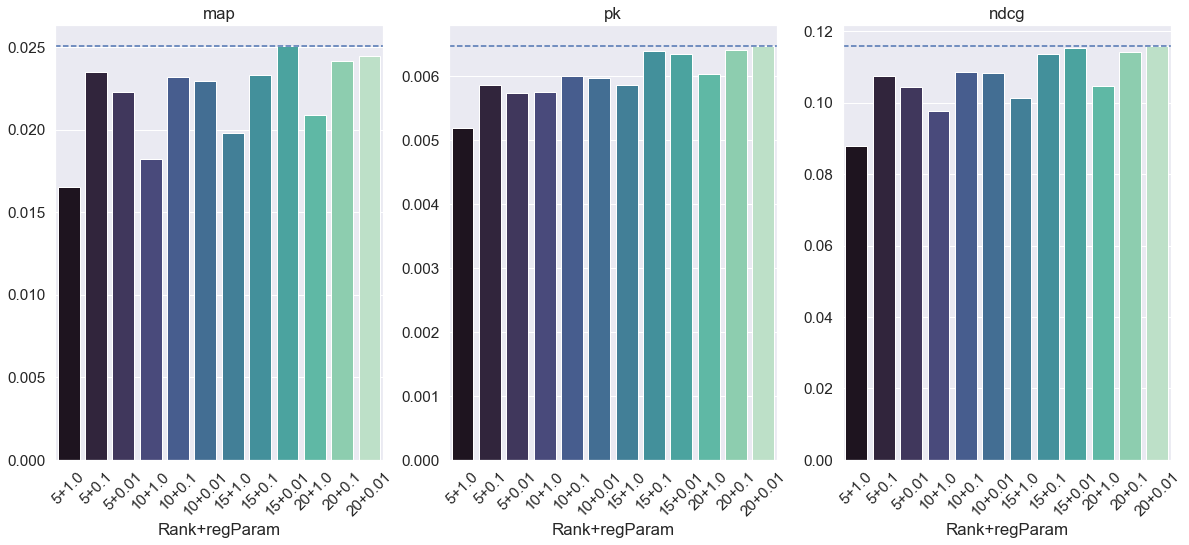

In [120]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots(1,3,figsize=(20,8))
for i,v in enumerate((set(df_melt.variable.values))):
    subdf = df_melt[df_melt['variable']==v]
    sns.barplot(x='Hyperparam',y = 'value',data = subdf,ax=ax[i],palette = 'mako')
    ax[i].set_title(v)
    ax[i].tick_params(axis='x', rotation=45)
    maxval = subdf.value.max()
    ax[i].axhline(maxval, ls='--')
    ax[i].set_xlabel('Rank+regParam')
    ax[i].set_ylabel('')

plt.show()